<a href="https://colab.research.google.com/github/krishnaduttPanchagnula/Python_projects/blob/main/Manhattan_Bike_behaviour_Analysis_using_Capital_Bikeshare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transportation behaviour modelling for bicycles

The data used here for the modelling is taken from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset.

The data here contians both categorical and numerical data which is used to develop an model to understand the biycling behaviour under different temperature , rain and windspeed and humidity etc.


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered




In [ ]:
!pip install evidently

     |████████████████████████████████| 15.2 MB 19.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


from evidently.dashboard import Dashboard
from evidently.tabs import RegressionPerformanceTab

from evidently.model_profile import Profile
from evidently.profile_sections import RegressionPerformanceProfileSection

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/github projects data/Manhattan transport modelling data/bike_transportmodelling_modified.csv', header = 0, sep = ',', parse_dates=['dteday'])
raw_data

NameError: ignored

splitting the data into train , test and predict subsets

In [ ]:
dt = raw_data.drop(['instant','dteday','mnth','hr','season', 'weekday', 'workingday','weathersit','casual','registered','temp'],1)
dt

,season_1,season_2,season_3,season_4,yr,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_1,weather_2,weather_3,weather_4,atemp,hum,windspeed,cnt
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.2879,0.81,0.0000,16
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.2727,0.80,0.0000,40
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.2727,0.80,0.0000,32
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.2879,0.75,0.0000,13
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.2576,0.60,0.1642,119
17375,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.2576,0.60,0.1642,89
17376,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.2576,0.60,0.1642,90
17377,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0.2727,0.56,0.1343,61


In [ ]:
target = 'cnt'

numerical_features = ['weather_1' ,	'weather_2', 	'weather_3' ,	'weather_4','holiday', 'atemp', 'hum', 'windspeed','cnt']

#categorical_features = ['season_1','season_2', 	'season_3','season_4','yr',	'month_1','month_2','month_3', 	
                        'month_4' ,	'month_5' ,	'month_6' ,	'month_7', 	'month_8', 	'month_9' ,	'month_10' ,	'month_11' ,
                        'month_12' ,	'hr_0', 	'hr_1', 	'hr_2' ,	'hr_3' ,	'hr_4' ,	'hr_5' ,	'hr_6' ,	'hr_7' ,	'hr_8' ,	'hr_9',
                        'hr_10' ,	'hr_11' ,	'hr_12' ,	'hr_13' ,	'hr_14' ,	'hr_15', 	'hr_16' ,	'hr_17' ,	'hr_18', 	'hr_19' ,	'hr_20', 	'hr_21',
                        'hr_22' ,	'hr_23' ,	'holiday' ,	'weekday_0' ,	'weekday_1' ,	'weekday_2' ,	'weekday_3' ,	'weekday_4' ,	'weekday_5' ,
                        'weekday_6', 	'weather_1' ,	'weather_2', 	'weather_3' ,	'weather_4']

features = numerical_features + categorical_features

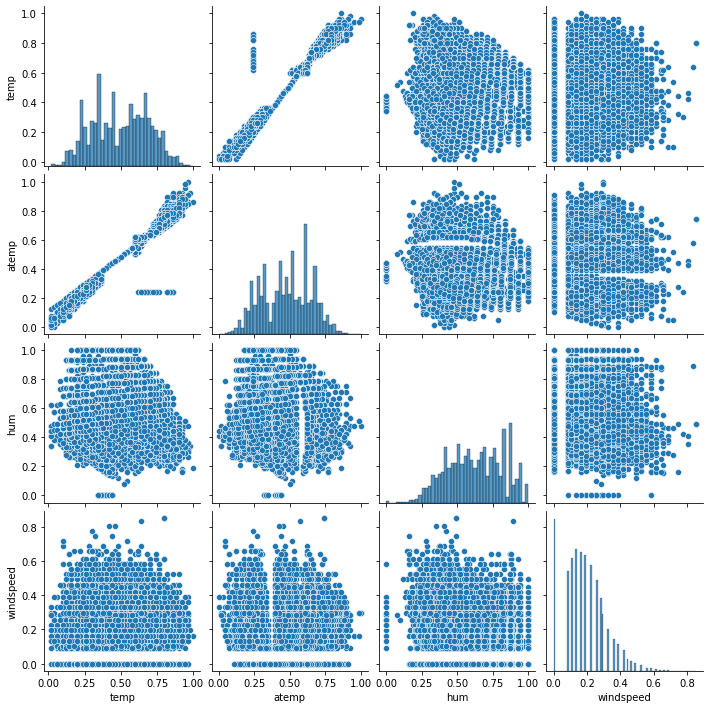

In [ ]:
sns.pairplot(dt[numerical_features],hue = 'holiday' )

In [ ]:
y =dt[numerical_features]

In [ ]:
corr = y.corr()

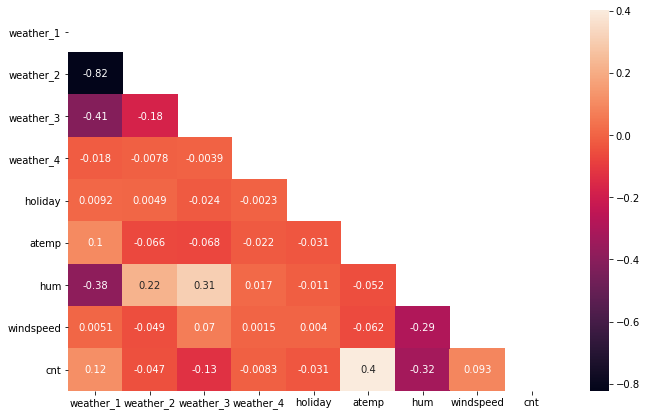

In [ ]:
plt.subplots(figsize = (11,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,annot=True,mask=mask) #, cmap=cmap)
